# 1: Import Libraries

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting
from sklearn.metrics import confusion_matrix

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.metrics import ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


# for path
import os

# 2: Reading the Dataset

In [3]:
dataset_path = '../input/dry-beans-classification-iti-ai-pro-intake02'
df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
print("The shape of the dataset is {}.\n\n".format(df.shape))

The shape of the dataset is (10834, 18).




# 3- Explainatry Data Analysis - EDA

In [4]:
# Shape or Size
df.shape

(10834, 18)

**The shape of the dataset is (10834, 18) , containing 17 Features beside (Y / Bean Class)**

In [5]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [6]:
df_copy=df.copy()

**The features are all numerical but (Y / Bean Class)**
<br>
**No Nullable Data**

In [7]:
#check missing value
df_copy.isna().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

In [8]:
#check duplicated
df_copy.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10829    False
10830    False
10831    False
10832    False
10833    False
Length: 10834, dtype: bool

In [9]:
#check impalance
df_copy['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

In [10]:
ordinal_encoding_mapping = {"DERMASON":1, "SIRA":2, "SEKER":3,"HOROZ":4, "CALI":5, "BARBUNYA":6,"BOMBAY":7}
df_copy["y"] = df_copy["y"].replace(ordinal_encoding_mapping)
df_copy

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,4
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,3
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,1
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,1
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708,3
10830,10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646,1
10831,10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412,5
10832,10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,0.988417,0.887206,0.800159,0.006422,0.001624,0.640255,0.994793,2


In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [12]:
df_copy.describe()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,5416.500000,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083,3.106701
std,3127.650742,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306,1.828991
min,0.000000,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687,1.000000
25%,2708.250000,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690,1.000000
50%,5416.500000,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397,3.000000
75%,8124.750000,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895,5.000000
max,10833.000000,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733,7.000000


# Data Visualization
**Heatmap**

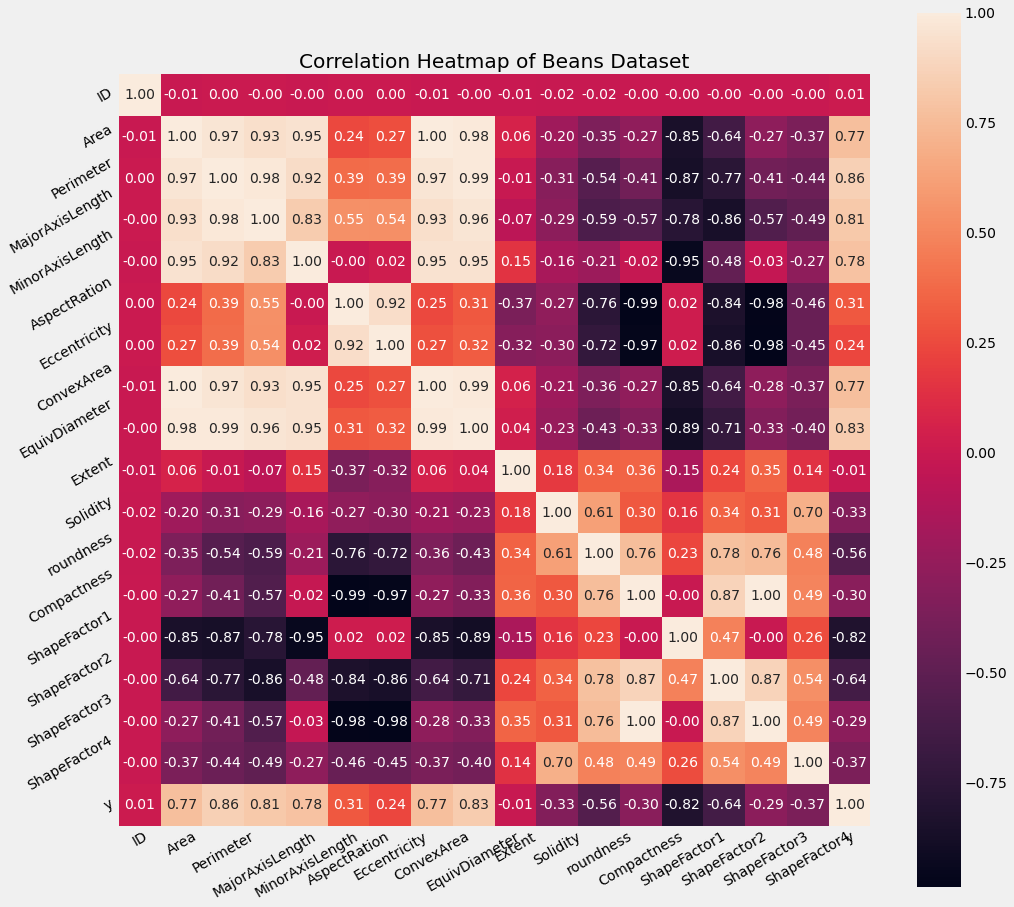

In [13]:
corr_matrix = df_copy.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

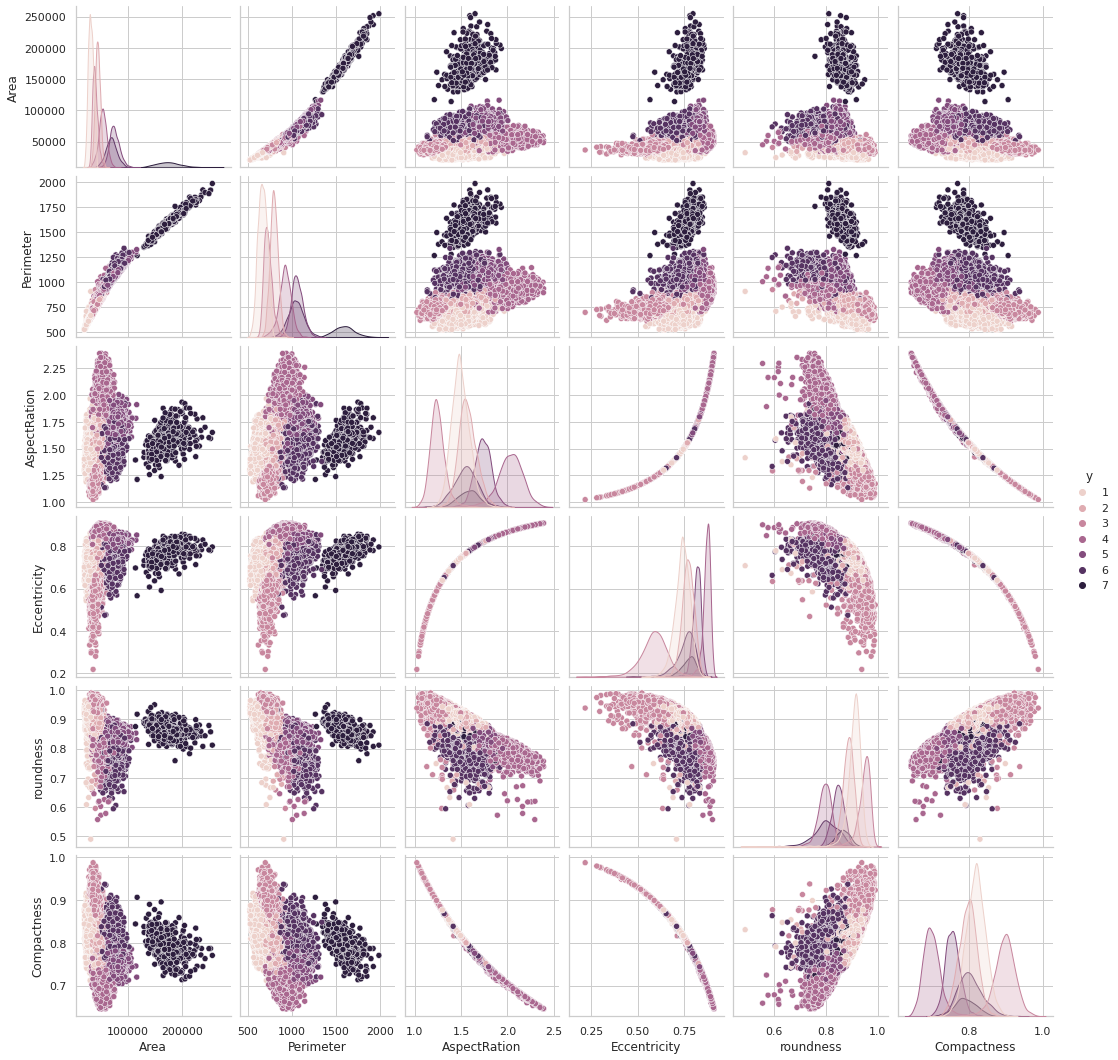

In [14]:
Strongly_corr_features = df_copy[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness","y"]]
Strongly_corr_features.head()
sns.set_theme(style="whitegrid")
sns.pairplot(Strongly_corr_features, hue="y")

<AxesSubplot:xlabel='y', ylabel='MajorAxisLength'>

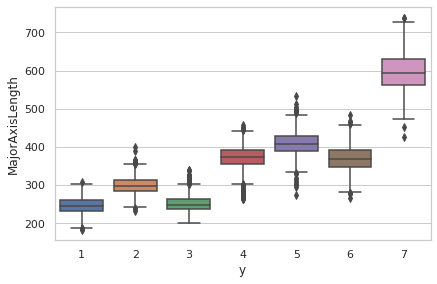

In [15]:
sns.boxplot(x="y", y="MajorAxisLength", data=df_copy)

<AxesSubplot:xlabel='y', ylabel='Area'>

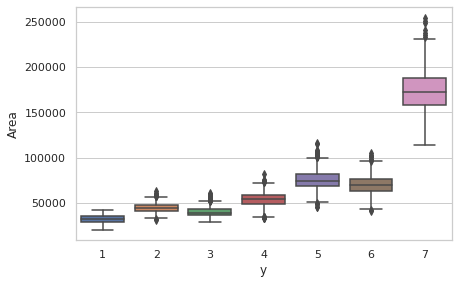

In [16]:
sns.boxplot(x="y", y="Area",data=df_copy)

<AxesSubplot:xlabel='y', ylabel='EquivDiameter'>

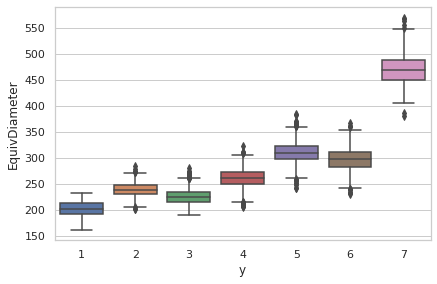

In [17]:
sns.boxplot(x="y", y="EquivDiameter",data=df_copy)

<AxesSubplot:xlabel='y', ylabel='ShapeFactor1'>

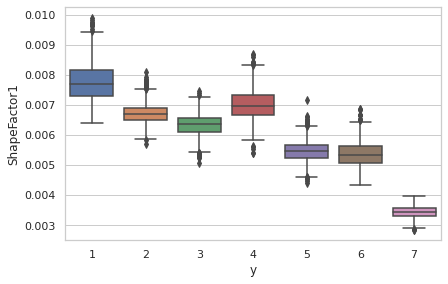

In [18]:
sns.boxplot(x="y", y="ShapeFactor1",data=df_copy)

<AxesSubplot:xlabel='y', ylabel='ShapeFactor2'>

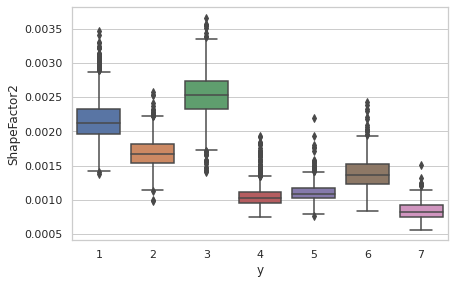

In [19]:
sns.boxplot(x="y", y="ShapeFactor2",data=df_copy)

<AxesSubplot:xlabel='y', ylabel='ShapeFactor3'>

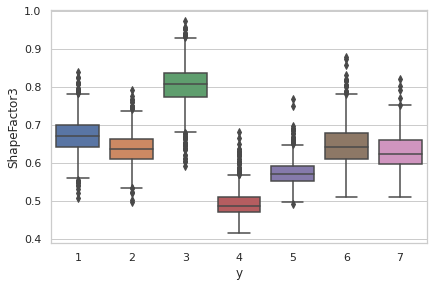

In [20]:
sns.boxplot(x="y", y="ShapeFactor3",data=df_copy)

<AxesSubplot:xlabel='y', ylabel='ShapeFactor4'>

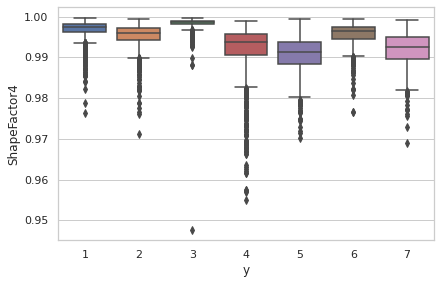

In [21]:
sns.boxplot(x="y", y="ShapeFactor4",data=df_copy)

<AxesSubplot:xlabel='y', ylabel='MinorAxisLength'>

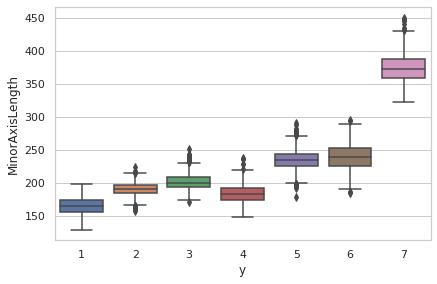

In [22]:
sns.boxplot(x="y", y="MinorAxisLength",data=df_copy)

<AxesSubplot:xlabel='y', ylabel='Compactness'>

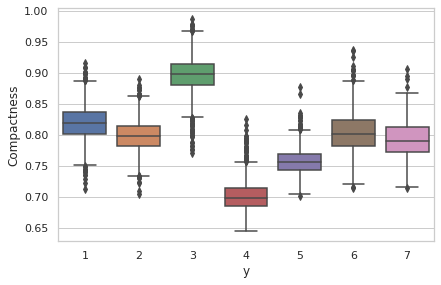

In [23]:
sns.boxplot(x="y", y="Compactness",data=df_copy)

<AxesSubplot:xlabel='y', ylabel='Eccentricity'>

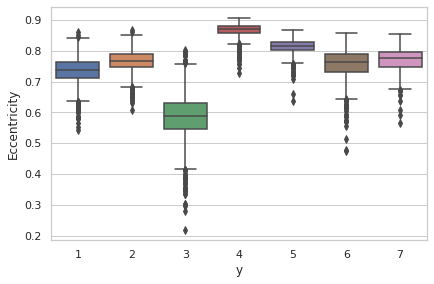

In [24]:
sns.boxplot(x="y", y="Eccentricity",data=df_copy)

<AxesSubplot:xlabel='y', ylabel='Perimeter'>

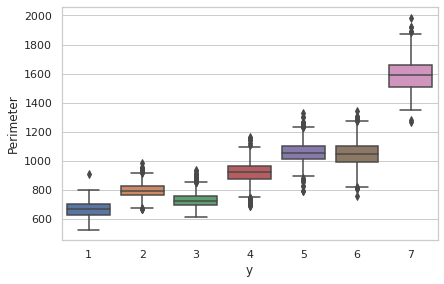

In [25]:
sns.boxplot(x="y", y="Perimeter", data=df_copy)

<AxesSubplot:xlabel='y', ylabel='roundness'>

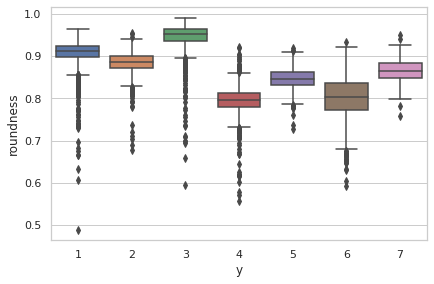

In [26]:
sns.boxplot(x="y", y="roundness", data=df_copy)

<AxesSubplot:xlabel='y', ylabel='AspectRation'>

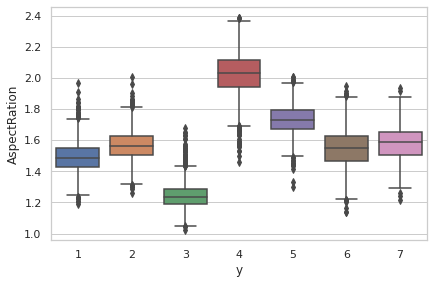

In [27]:
sns.boxplot(x="y", y="AspectRation", data=df_copy)

<AxesSubplot:xlabel='y', ylabel='ConvexArea'>

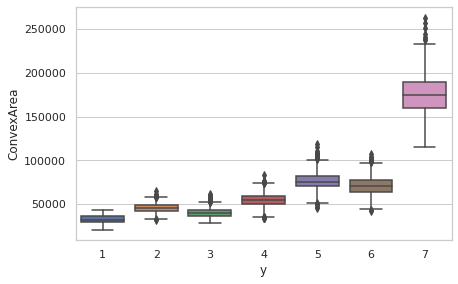

In [28]:
sns.boxplot(x="y", y="ConvexArea", data=df_copy)

<AxesSubplot:xlabel='y', ylabel='Extent'>

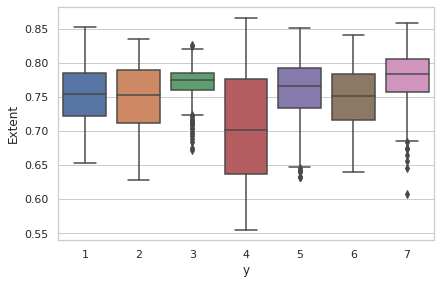

In [29]:
sns.boxplot(x="y", y="Extent", data=df_copy)

<AxesSubplot:xlabel='y', ylabel='Solidity'>

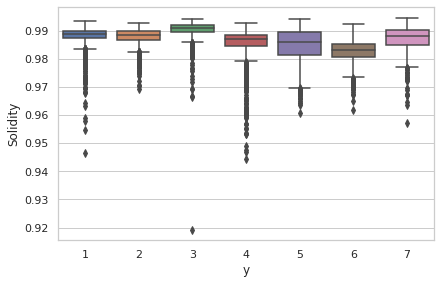

In [30]:
sns.boxplot(x="y", y="Solidity", data=df_copy)

In [31]:
#for x in ["MajorAxisLength"]:
 #   q75,q25 = np.percentile(df_copy.loc[:,x],[75,25])
  #  intr_qr = q75-q25
 
  #  max = q75+(1.5*intr_qr)
   # min = q25-(1.5*intr_qr)
 
   # df_copy.loc[df_copy[x] < min,x] = np.nan
   # df_copy.loc[df_copy[x] > max,x] = np.nan

In [32]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [33]:
df_copy.isna().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

## Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 

In [34]:
from sklearn.model_selection import cross_val_score,train_test_split

df_train, df_val = train_test_split(df_copy, test_size=0.2, random_state=42,shuffle=True)

X_train = df_train.drop(columns=['ID', 'y'])
y_train = df_train['y']

X_val = df_val.drop(columns=['ID', 'y'])
y_val = df_val['y']


print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(8667, 16) (2167, 16) (8667,) (2167,)


# 4- Feature Engineering

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10834.0,5416.500000,3127.650742,0.000000,2708.250000,5416.500000,8124.750000,10833.000000
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195


### Data scaling using StandardScaler

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train= pd.DataFrame(X_train)
X_val = pd.DataFrame(scaler.transform(X_val))
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0,8667.0,7.808838e-17,1.000058,-1.103344,-0.567711,-0.288859,0.270906,6.697292
1,8667.0,-1.992176e-16,1.000058,-1.533569,-0.705614,-0.287812,0.558032,4.947327
2,8667.0,7.870325e-17,1.000058,-1.560514,-0.774609,-0.278525,0.655278,4.662166
3,8667.0,7.396875e-16,1.000058,-1.604526,-0.586244,-0.220841,0.325658,5.481397
4,8667.0,-5.775158e-16,1.000058,-2.284754,-0.606887,-0.128458,0.503644,3.297050
5,8667.0,-1.018633e-15,1.000058,-5.828161,-0.373886,0.146453,0.645457,1.717406
6,8667.0,-8.341724e-17,1.000058,-1.100484,-0.570165,-0.290592,0.274161,6.772646
7,8667.0,-9.796914e-17,1.000058,-1.539611,-0.639646,-0.250531,0.433956,5.245462
8,8667.0,1.554389e-15,1.000058,-3.975194,-0.637953,0.206134,0.759467,2.218428
9,8667.0,-4.168075e-14,1.000058,-14.655531,-0.326455,0.245176,0.616290,1.618165


## Model Training

### **PCA**

In [37]:
from sklearn.decomposition import PCA

<BarContainer object of 16 artists>

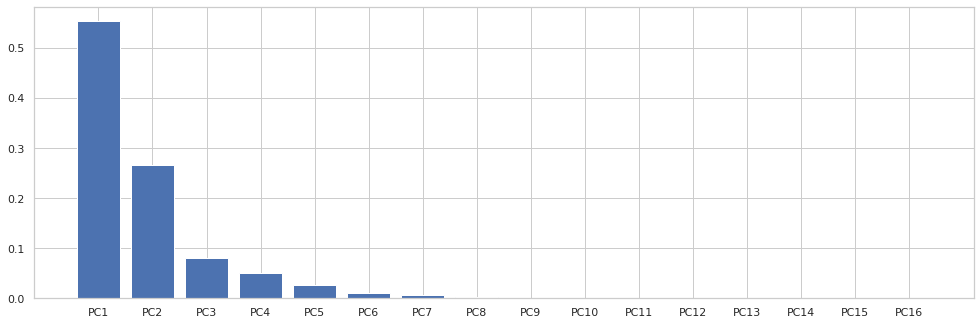

In [38]:
pca = PCA(random_state=22)
pca.fit(X_train)
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in list(range(1, num_pc + 1))]
f, ax = plt.subplots(figsize=(15,5))
plt.bar(x=pc_list, height=pca.explained_variance_ratio_)

In [39]:
pca = PCA(n_components=7, random_state=22)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_train

array([[ 2.39573679,  0.32028462,  0.11806115, ..., -0.60244737,
        -0.26109865, -0.20653198],
       [ 0.89830638, -1.04025661, -1.21878151, ...,  0.26711155,
        -0.22417716, -0.31390613],
       [ 1.8394566 , -0.93294705,  0.17536735, ..., -0.43257833,
        -0.22758742, -0.1415407 ],
       ...,
       [-3.53305952,  2.63762433, -0.35100609, ...,  0.46630757,
        -0.43873645,  0.1445999 ],
       [-2.67144105,  1.27703046,  0.33425209, ...,  0.12947158,
         0.0654833 , -0.34670065],
       [ 3.49714139,  0.59349654,  2.18672876, ...,  0.92965906,
        -0.38323615, -0.26448196]])

### **GMM (Clustring Beore Classification)**

In [40]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=7, random_state=22).fit(X_train)
proba = gmm.predict_proba(X_train)
X_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(proba)], axis=1)


proba_test = gmm.predict_proba(X_val)
X_val = pd.concat([pd.DataFrame(X_val), pd.DataFrame(proba_test)], axis=1)

X_train

,0,1,2,3,4,5,6,0,1,2,3,4,5,6
0,2.395737,0.320285,0.118061,0.361254,-0.602447,-0.261099,-0.206532,3.684562e-67,0.000000e+00,9.995249e-01,0.000475,2.528642e-137,3.168434e-232,7.312405e-14
1,0.898306,-1.040257,-1.218782,-1.106454,0.267112,-0.224177,-0.313906,2.056816e-01,7.146149e-104,1.222888e-05,0.009152,0.000000e+00,4.881686e-99,7.851538e-01
2,1.839457,-0.932947,0.175367,-0.685944,-0.432578,-0.227587,-0.141541,1.379671e-11,1.748589e-188,9.500784e-01,0.035452,1.120042e-266,2.230942e-132,1.446991e-02
3,2.064729,-4.139379,-1.285074,-0.470398,-0.525941,0.282028,0.456290,5.402928e-69,9.295319e-156,2.696522e-77,0.000175,0.000000e+00,0.000000e+00,9.998247e-01
4,-0.938478,-1.466747,-0.583917,0.918675,-0.727213,0.390773,-0.161522,9.471671e-01,4.623331e-02,7.490909e-87,0.006600,0.000000e+00,6.014446e-41,1.286696e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8662,-1.907429,0.777056,-0.412757,0.651750,-0.367186,-0.026142,-0.253300,9.976311e-01,1.844273e-05,9.266532e-63,0.000141,0.000000e+00,2.209732e-03,1.271531e-70
8663,2.282034,-3.771378,-1.560980,-1.084586,-0.226864,-0.009640,0.492633,5.833318e-63,3.028126e-191,5.913261e-49,0.000013,0.000000e+00,0.000000e+00,9.999870e-01
8664,-3.533060,2.637624,-0.351006,-0.798437,0.466308,-0.438736,0.144600,1.679307e-41,2.645408e-23,9.731274e-155,0.000030,0.000000e+00,9.999696e-01,9.872512e-317
8665,-2.671441,1.277030,0.334252,-0.643871,0.129472,0.065483,-0.346701,8.230106e-07,1.518835e-04,5.884265e-110,0.044953,0.000000e+00,9.548940e-01,4.143317e-156


### **Making Columns' Names Unique**

In [41]:
df_columns = ['0', '1', '2', '3', '4', '5', '6', '0', '1', '2', '3', '4', '5', '6']

def uniquify(df_columns):
    seen = set()

    for item in df_columns:
        fudge = 1
        newitem = item

        while newitem in seen:
            fudge += 1
            newitem = "{}_{}".format(item, fudge)

        yield newitem
        seen.add(newitem)
list(uniquify(df_columns))

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '0_2',
 '1_2',
 '2_2',
 '3_2',
 '4_2',
 '5_2',
 '6_2']

In [42]:
X_train.columns=list(uniquify(df_columns))
X_train

,0,1,2,3,4,5,6,0_2,1_2,2_2,3_2,4_2,5_2,6_2
0,2.395737,0.320285,0.118061,0.361254,-0.602447,-0.261099,-0.206532,3.684562e-67,0.000000e+00,9.995249e-01,0.000475,2.528642e-137,3.168434e-232,7.312405e-14
1,0.898306,-1.040257,-1.218782,-1.106454,0.267112,-0.224177,-0.313906,2.056816e-01,7.146149e-104,1.222888e-05,0.009152,0.000000e+00,4.881686e-99,7.851538e-01
2,1.839457,-0.932947,0.175367,-0.685944,-0.432578,-0.227587,-0.141541,1.379671e-11,1.748589e-188,9.500784e-01,0.035452,1.120042e-266,2.230942e-132,1.446991e-02
3,2.064729,-4.139379,-1.285074,-0.470398,-0.525941,0.282028,0.456290,5.402928e-69,9.295319e-156,2.696522e-77,0.000175,0.000000e+00,0.000000e+00,9.998247e-01
4,-0.938478,-1.466747,-0.583917,0.918675,-0.727213,0.390773,-0.161522,9.471671e-01,4.623331e-02,7.490909e-87,0.006600,0.000000e+00,6.014446e-41,1.286696e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8662,-1.907429,0.777056,-0.412757,0.651750,-0.367186,-0.026142,-0.253300,9.976311e-01,1.844273e-05,9.266532e-63,0.000141,0.000000e+00,2.209732e-03,1.271531e-70
8663,2.282034,-3.771378,-1.560980,-1.084586,-0.226864,-0.009640,0.492633,5.833318e-63,3.028126e-191,5.913261e-49,0.000013,0.000000e+00,0.000000e+00,9.999870e-01
8664,-3.533060,2.637624,-0.351006,-0.798437,0.466308,-0.438736,0.144600,1.679307e-41,2.645408e-23,9.731274e-155,0.000030,0.000000e+00,9.999696e-01,9.872512e-317
8665,-2.671441,1.277030,0.334252,-0.643871,0.129472,0.065483,-0.346701,8.230106e-07,1.518835e-04,5.884265e-110,0.044953,0.000000e+00,9.548940e-01,4.143317e-156


In [43]:
X_val.columns=list(uniquify(df_columns))
X_val

,0,1,2,3,4,5,6,0_2,1_2,2_2,3_2,4_2,5_2,6_2
0,-2.313880,-0.826162,-0.562951,1.154166,0.025935,0.448992,-0.145947,1.181268e-12,9.999755e-01,7.281938e-187,0.000024,0.000000e+00,1.156402e-24,5.918510e-84
1,2.749523,-1.053904,-0.648806,-1.637110,0.888652,-0.649330,0.092860,6.881955e-62,0.000000e+00,8.860649e-01,0.017742,2.078907e-183,2.009917e-313,9.619308e-02
2,-1.380904,-2.041436,-1.164957,-0.511394,0.307713,0.352239,-0.100894,3.286774e-08,9.994929e-01,3.508259e-144,0.000507,0.000000e+00,8.764557e-58,3.926055e-35
3,-0.743029,-0.294552,0.320941,0.467083,0.280280,-0.185452,-0.161761,9.999422e-01,4.458338e-11,2.005888e-39,0.000058,0.000000e+00,2.463566e-24,5.891916e-27
4,1.649713,-0.364118,0.197192,-0.219868,-0.194226,-0.126934,-0.421677,5.480398e-14,2.702284e-224,9.936819e-01,0.006005,4.705466e-241,4.492050e-127,3.128273e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,-2.679781,0.363062,-0.949015,0.919404,0.397665,-0.029492,-0.044736,9.599001e-06,9.999000e-01,1.172037e-137,0.000090,0.000000e+00,4.911200e-08,1.046197e-102
2163,2.439994,-2.359551,-0.942607,-0.050065,-0.655495,-0.083525,0.202779,3.719465e-40,1.188953e-238,1.335357e-12,0.000156,0.000000e+00,8.541814e-297,9.998445e-01
2164,-4.699593,3.047055,0.366799,-0.114725,-0.125873,-0.284664,0.754399,2.971200e-155,3.022505e-33,0.000000e+00,0.000013,0.000000e+00,9.999872e-01,0.000000e+00
2165,-1.192431,-2.803846,2.095633,-0.964911,1.349426,0.288496,0.342773,2.394590e-35,2.601719e-09,1.723009e-263,1.000000,0.000000e+00,5.786728e-121,5.469139e-97


### **SVM Model**

In [44]:
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Create an instance of the classifier
classifier= SVC(C=34.5,gamma=0.092,tol=0.091)



# Train the classifier
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
y_pred1 = classifier.predict(X_train)

### **1st way to calculate Accuracy Score in validation dataset**

In [45]:
# 1st way to calculate Accuracy 

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val,y_pred)

print ( 'Accuracy = ', accuracy)

Accuracy =  0.9330872173511767


**Accuracy Score in training dataset**

In [46]:
# 1st way to calculate Accuracy 

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train,y_pred1)

print ( 'Accuracy = ', accuracy)

Accuracy =  0.943232952578747


### **2nd way to calculate Accuracy Score in validation dataset**

In [47]:
# 2nd way to calculate Accuracy 
# calc Accuracy using confusion_matrix paramaters

cm = confusion_matrix(y_val, y_pred)

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

accuracy(cm)

0.9330872173511767

### **Calculate F1 Score in validation dataset**

In [48]:
from sklearn.metrics import f1_score

f1_score= f1_score(y_val, y_pred,average='macro')

print ( 'f1_score= ', f1_score)

f1_score=  0.9435925379242667


###  **Visualization of Confusion Matrix**

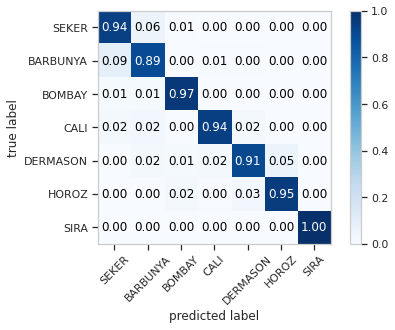

In [49]:
# Classes
classes  = np.array(["SEKER","BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SIRA"])

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

## Model Prediction 

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 


In [50]:
dataset_path = '../input/dry-beans-classification-iti-ai-pro-intake02/'
df_test = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
df_test.head()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2709 non-null   int64  
 1   Area             2709 non-null   int64  
 2   Perimeter        2709 non-null   float64
 3   MajorAxisLength  2709 non-null   float64
 4   MinorAxisLength  2709 non-null   float64
 5   AspectRation     2709 non-null   float64
 6   Eccentricity     2709 non-null   float64
 7   ConvexArea       2709 non-null   int64  
 8   EquivDiameter    2709 non-null   float64
 9   Extent           2709 non-null   float64
 10  Solidity         2709 non-null   float64
 11  roundness        2709 non-null   float64
 12  Compactness      2709 non-null   float64
 13  ShapeFactor1     2709 non-null   float64
 14  ShapeFactor2     2709 non-null   float64
 15  ShapeFactor3     2709 non-null   float64
 16  ShapeFactor4     2709 non-null   float64
dtypes: float64(14)

In [51]:
# Predicting y of Test data

# Step 1 - applying scalling
X_test_scaled = scaler.transform(df_test.drop(columns = ['ID']))
X_test_scaled=pca.transform(X_test_scaled)

proba = gmm.predict_proba(X_test_scaled)
X_test_scaled = pd.concat([pd.DataFrame(X_test_scaled), pd.DataFrame(proba)], axis=1)
X_test_scaled.columns=list(uniquify(df_columns))

y_test_predicted = classifier.predict(X_test_scaled)

# add y column to the test data
df_test['y'] = y_test_predicted
df_test['y']=df_test['y'].map({1:"DERMASON", 2:"SIRA", 3:"SEKER",4:"HOROZ", 5:"CALI", 6:"BARBUNYA",7:"BOMBAY"})

df_test.head(30)

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,HOROZ
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,DERMASON
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,BARBUNYA
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,DERMASON
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,BOMBAY
5,10839,38322,731.614,273.186925,178.915978,1.526901,0.755697,38754,220.891570,0.768469,0.988853,0.899692,0.808573,0.007129,0.001880,0.653790,0.998273,DERMASON
6,10840,29600,642.141,232.852471,162.514515,1.432810,0.716167,30013,194.133692,0.714286,0.986239,0.902071,0.833720,0.007867,0.002344,0.695089,0.995930,DERMASON
7,10841,36554,698.178,247.484527,188.257339,1.314608,0.649123,36868,215.735946,0.789981,0.991483,0.942350,0.871715,0.006770,0.002412,0.759887,0.998953,SEKER
8,10842,34945,693.678,261.340571,170.796575,1.530128,0.756892,35293,210.934482,0.766842,0.990140,0.912597,0.807125,0.007479,0.001958,0.651451,0.996803,DERMASON
9,10843,45022,794.894,306.172933,187.868243,1.629722,0.789616,45389,239.423873,0.814996,0.991914,0.895398,0.781989,0.006801,0.001569,0.611507,0.996586,SIRA


# Submission File Generation

In [52]:
df_test[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)